### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
cc = ChromatogramCreator(xcms_output)

DEBUG:Chemicals:Loading 0 chromatograms
../codes\VMSfunctions\Common.py:58: RuntimeWarning:

divide by zero encountered in double_scalars

DEBUG:Chemicals:Loading 5000 chromatograms
DEBUG:Chemicals:Loading 10000 chromatograms
DEBUG:Chemicals:Loading 15000 chromatograms
DEBUG:Chemicals:Loading 20000 chromatograms
DEBUG:Chemicals:Loading 25000 chromatograms
DEBUG:Chemicals:Loading 30000 chromatograms
DEBUG:Chemicals:Loading 35000 chromatograms
DEBUG:Chemicals:Loading 40000 chromatograms
DEBUG:Chemicals:Loading 45000 chromatograms


### Generate some chemicals

In [8]:
hmdb = load_obj('../models/hmdb_compounds.p')

In [9]:
chemicals = ChemicalCreator(ps)

In [10]:
min_ms1_intensity = 2E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1000)]
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, 2000, 2, "Known", None, hmdb, 0.1)

DEBUG:Chemicals:2000 ms1 peaks to be created.
DEBUG:Chemicals:i = 0
DEBUG:Chemicals:i = 25
DEBUG:Chemicals:i = 50
DEBUG:Chemicals:i = 75
DEBUG:Chemicals:i = 100
DEBUG:Chemicals:i = 125
DEBUG:Chemicals:i = 150
DEBUG:Chemicals:i = 175
DEBUG:Chemicals:i = 200
DEBUG:Chemicals:i = 225
DEBUG:Chemicals:i = 250
DEBUG:Chemicals:i = 275
DEBUG:Chemicals:i = 300
DEBUG:Chemicals:i = 325
DEBUG:Chemicals:i = 350
DEBUG:Chemicals:i = 375
DEBUG:Chemicals:i = 400
DEBUG:Chemicals:i = 425
DEBUG:Chemicals:i = 450
DEBUG:Chemicals:i = 475
DEBUG:Chemicals:i = 500
DEBUG:Chemicals:i = 525
DEBUG:Chemicals:i = 550
DEBUG:Chemicals:i = 575
DEBUG:Chemicals:i = 600
DEBUG:Chemicals:i = 625
DEBUG:Chemicals:i = 650
DEBUG:Chemicals:i = 675
DEBUG:Chemicals:i = 700
DEBUG:Chemicals:i = 725
DEBUG:Chemicals:i = 750
DEBUG:Chemicals:i = 775
DEBUG:Chemicals:i = 800
DEBUG:Chemicals:i = 825
DEBUG:Chemicals:i = 850
DEBUG:Chemicals:i = 875
DEBUG:Chemicals:i = 900
DEBUG:Chemicals:i = 925
DEBUG:Chemicals:i = 950
DEBUG:Chemicals:i = 975

KnownChemical - 'C24H40O2' rt=183.17 max_intensity=5056473.31
[ 181965.3125     127200.3203125  164822.734375   457056.375
  484600.84375    682409.25       637826.0625     500734.40625
  474897.8125     670289.625      848129.1875     933401.875
 1367511.        1921895.125     1898061.625     3224492.75
 5052670.5      ]


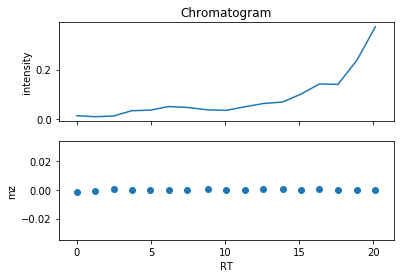

KnownChemical - 'C19H29NO3' rt=395.71 max_intensity=822516.45
[241729.953125 279658.1875   222865.640625 442945.1875   674385.125
 621086.5      822536.25     804487.5      654435.875    479602.53125
 139212.59375  242426.125    206081.328125 180446.609375 257378.96875
 195963.875    389334.28125  352102.28125  270125.0625   198711.609375
 189195.671875]


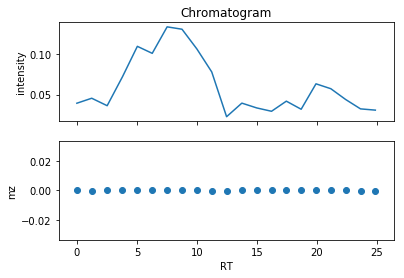

KnownChemical - 'C17H25NO3' rt=742.83 max_intensity=2389239.85
[ 186976.53125  369568.375    756907.9375  1373970.375   1944279.875
 2074009.75    2388904.75    2170844.75    1948488.75    1534702.25
 1150638.      1067851.75   ]


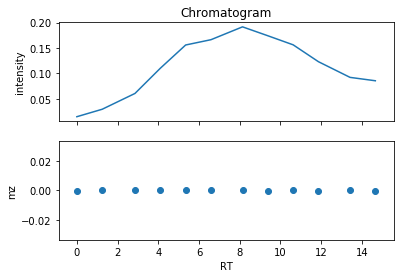

KnownChemical - 'C12H22O' rt=385.61 max_intensity=256964.27
[222570.34375  256951.453125 231082.703125 248146.875    189446.953125
 218884.046875 150747.21875 ]


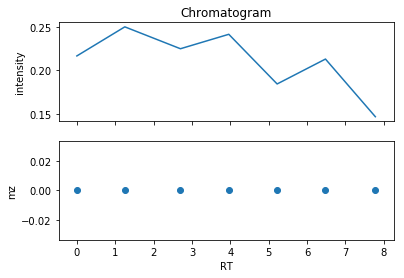

KnownChemical - 'C12H31N4O' rt=401.88 max_intensity=1101732.12
[ 347314.46875  423202.5625   409317.15625  637440.6875   563085.5625
  643898.75     738344.3125  1101818.25     709692.875    543573.3125
  410814.375    349194.34375  220751.375  ]


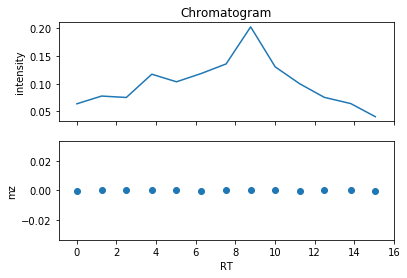

KnownChemical - 'C11H23N3O2' rt=733.15 max_intensity=360950.02
[278000.34375 328623.5     282477.84375 324491.34375 238265.9375
 360970.5     321274.375   344689.34375 302292.5     315437.71875
 220462.625   193951.3125 ]


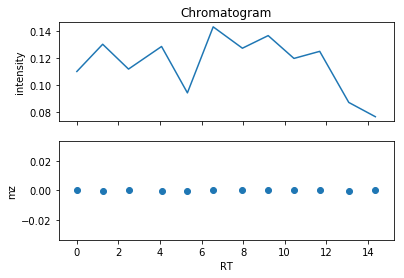

KnownChemical - 'C7H11NO6S' rt=495.15 max_intensity=830319.55
[785028.5     712797.6875  830308.375   762938.9375  713976.0625
 499878.875   500250.53125 446552.09375 463140.875   492343.75
 364269.90625 490234.03125]


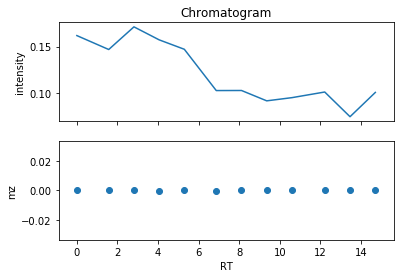

KnownChemical - 'C11H11N5O3S2' rt=313.68 max_intensity=970651.09
[137586.65625   193435.265625  154362.03125   170591.8125
 280096.75      576329.5625    777872.25      832252.0625
 970655.9375    865991.125     926836.3125    545089.5625
 527622.1875    318454.0625    259392.8125    263885.34375
 245240.203125   93725.1875     78742.7890625  97129.5078125]


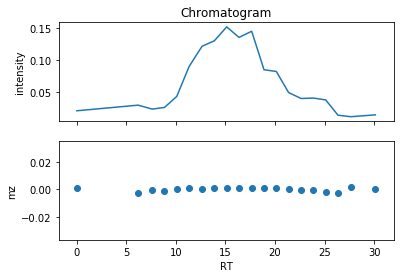

KnownChemical - 'C20H33NO' rt=738.59 max_intensity=3904486.02
[ 153518.71875  456735.90625  910431.9375  2548250.75    3617728.75
 3905013.5     2834616.25    1996117.      1336259.       705537.3125 ]


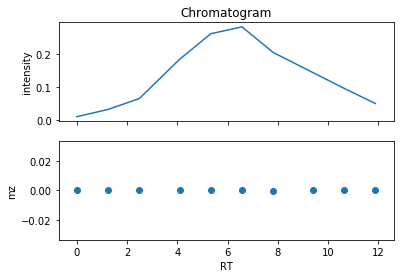

KnownChemical - 'C14H35N5' rt=482.25 max_intensity=229080.81
[ 24546.28125     36429.4609375   19600.83984375  26344.43945312
  20459.27734375  21624.75976562  30567.56054688  19601.96289062
  34469.6875      30106.13671875  31203.67773438  23367.32226562
  41825.09375     39947.140625    23891.88476562  68257.625
  22724.0234375   74332.171875    34252.61328125  39368.80859375
  31628.64648438  34973.953125    62138.8203125   69385.25
  32104.6484375   84866.8359375   37840.234375    35115.21875
  46495.84375     24900.04296875  31575.578125    82077.796875
  27012.75585938 110472.5859375  111504.625       49256.8359375
 133810.578125   101863.5625     136304.03125     42574.90625
  91810.546875    95787.96875     83288.34375     83539.8359375
 141285.515625   123295.09375    164733.328125   103939.4140625
 136757.640625   228819.78125    162875.65625    229077.578125  ]


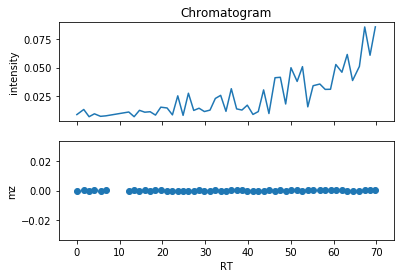

In [11]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in dataset[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

In [17]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

1080.3488974723275it [09:47,  1.84it/s]                                                                                           


In [18]:
controller.write_mzML('my_analysis', '../models/out.mzML')

In [23]:
chem = controller.mass_spec.chemicals[0]
peaks = controller.mass_spec.chemicals_to_peaks[chem]
print(chem)
for p in peaks:
    print(p)

KnownChemical - 'C24H40O2' rt=183.17 max_intensity=5056473.31
Peak mz=361.3088 rt=183.18 intensity=1729.60 ms_level=1
Peak mz=402.3354 rt=183.18 intensity=6.32 ms_level=1
Peak mz=393.3350 rt=183.18 intensity=1.41 ms_level=1
Peak mz=378.3354 rt=183.18 intensity=48094.71 ms_level=1
Peak mz=383.2908 rt=183.18 intensity=87.95 ms_level=1
Peak mz=399.2647 rt=183.18 intensity=0.00 ms_level=1
Peak mz=405.2727 rt=183.18 intensity=0.34 ms_level=1
Peak mz=424.3173 rt=183.18 intensity=0.80 ms_level=1
Peak mz=437.2206 rt=183.18 intensity=2.04 ms_level=1
Peak mz=439.3228 rt=183.18 intensity=1921.27 ms_level=1
Peak mz=443.3619 rt=183.18 intensity=0.00 ms_level=1
Peak mz=721.6117 rt=183.18 intensity=247.37 ms_level=1
Peak mz=738.6382 rt=183.18 intensity=70.93 ms_level=1
Peak mz=362.3122 rt=183.18 intensity=461.69 ms_level=1
Peak mz=363.3155 rt=183.18 intensity=59.05 ms_level=1
Peak mz=361.3089 rt=183.25 intensity=1698.62 ms_level=1
Peak mz=402.3354 rt=183.25 intensity=6.21 ms_level=1
Peak mz=393.3351 

Peak mz=361.3093 rt=184.16 intensity=1315.04 ms_level=1
Peak mz=402.3359 rt=184.16 intensity=4.80 ms_level=1
Peak mz=393.3355 rt=184.16 intensity=1.07 ms_level=1
Peak mz=378.3359 rt=184.16 intensity=36566.92 ms_level=1
Peak mz=383.2913 rt=184.16 intensity=66.87 ms_level=1
Peak mz=399.2652 rt=184.16 intensity=0.00 ms_level=1
Peak mz=405.2732 rt=184.16 intensity=0.26 ms_level=1
Peak mz=424.3178 rt=184.16 intensity=0.61 ms_level=1
Peak mz=437.2211 rt=184.16 intensity=1.55 ms_level=1
Peak mz=439.3233 rt=184.16 intensity=1460.76 ms_level=1
Peak mz=443.3624 rt=184.16 intensity=0.00 ms_level=1
Peak mz=721.6122 rt=184.16 intensity=188.08 ms_level=1
Peak mz=738.6387 rt=184.16 intensity=53.93 ms_level=1
Peak mz=362.3127 rt=184.16 intensity=351.03 ms_level=1
Peak mz=363.3160 rt=184.16 intensity=44.90 ms_level=1
Peak mz=361.3094 rt=184.23 intensity=1287.62 ms_level=1
Peak mz=402.3359 rt=184.23 intensity=4.70 ms_level=1
Peak mz=393.3356 rt=184.23 intensity=1.05 ms_level=1
Peak mz=378.3359 rt=184.23

Peak mz=402.3367 rt=185.18 intensity=5.24 ms_level=1
Peak mz=393.3364 rt=185.18 intensity=1.17 ms_level=1
Peak mz=378.3367 rt=185.18 intensity=39870.74 ms_level=1
Peak mz=383.2921 rt=185.18 intensity=72.91 ms_level=1
Peak mz=399.2660 rt=185.18 intensity=0.00 ms_level=1
Peak mz=405.2740 rt=185.18 intensity=0.28 ms_level=1
Peak mz=424.3186 rt=185.18 intensity=0.66 ms_level=1
Peak mz=437.2219 rt=185.18 intensity=1.69 ms_level=1
Peak mz=439.3241 rt=185.18 intensity=1592.74 ms_level=1
Peak mz=443.3632 rt=185.18 intensity=0.00 ms_level=1
Peak mz=721.6130 rt=185.18 intensity=205.07 ms_level=1
Peak mz=738.6395 rt=185.18 intensity=58.80 ms_level=1
Peak mz=362.3135 rt=185.18 intensity=382.75 ms_level=1
Peak mz=363.3169 rt=185.18 intensity=48.96 ms_level=1
Peak mz=361.3102 rt=185.24 intensity=1453.21 ms_level=1
Peak mz=402.3368 rt=185.24 intensity=5.31 ms_level=1
Peak mz=393.3364 rt=185.24 intensity=1.19 ms_level=1
Peak mz=378.3368 rt=185.24 intensity=40409.24 ms_level=1
Peak mz=383.2921 rt=185.2

Peak mz=393.3365 rt=186.18 intensity=2.28 ms_level=1
Peak mz=378.3369 rt=186.18 intensity=77435.76 ms_level=1
Peak mz=383.2923 rt=186.18 intensity=141.60 ms_level=1
Peak mz=399.2662 rt=186.18 intensity=0.00 ms_level=1
Peak mz=405.2742 rt=186.18 intensity=0.55 ms_level=1
Peak mz=424.3188 rt=186.18 intensity=1.28 ms_level=1
Peak mz=437.2221 rt=186.18 intensity=3.29 ms_level=1
Peak mz=439.3243 rt=186.18 intensity=3093.37 ms_level=1
Peak mz=443.3634 rt=186.18 intensity=0.00 ms_level=1
Peak mz=721.6132 rt=186.18 intensity=398.28 ms_level=1
Peak mz=738.6397 rt=186.18 intensity=114.21 ms_level=1
Peak mz=362.3137 rt=186.18 intensity=743.36 ms_level=1
Peak mz=363.3170 rt=186.18 intensity=95.08 ms_level=1
Peak mz=361.3103 rt=186.25 intensity=2944.36 ms_level=1
Peak mz=402.3368 rt=186.25 intensity=10.76 ms_level=1
Peak mz=393.3365 rt=186.25 intensity=2.41 ms_level=1
Peak mz=378.3368 rt=186.25 intensity=81873.35 ms_level=1
Peak mz=383.2922 rt=186.25 intensity=149.71 ms_level=1
Peak mz=399.2662 rt=

Peak mz=393.3362 rt=187.09 intensity=3.59 ms_level=1
Peak mz=378.3365 rt=187.09 intensity=122216.17 ms_level=1
Peak mz=383.2919 rt=187.09 intensity=223.48 ms_level=1
Peak mz=399.2659 rt=187.09 intensity=0.00 ms_level=1
Peak mz=405.2739 rt=187.09 intensity=0.86 ms_level=1
Peak mz=424.3185 rt=187.09 intensity=2.03 ms_level=1
Peak mz=437.2218 rt=187.09 intensity=5.19 ms_level=1
Peak mz=439.3239 rt=187.09 intensity=4882.24 ms_level=1
Peak mz=443.3631 rt=187.09 intensity=0.00 ms_level=1
Peak mz=721.6128 rt=187.09 intensity=628.61 ms_level=1
Peak mz=738.6394 rt=187.09 intensity=180.25 ms_level=1
Peak mz=362.3134 rt=187.09 intensity=1173.24 ms_level=1
Peak mz=363.3167 rt=187.09 intensity=150.07 ms_level=1
Peak mz=361.3100 rt=187.17 intensity=4412.01 ms_level=1
Peak mz=402.3365 rt=187.17 intensity=16.12 ms_level=1
Peak mz=393.3362 rt=187.17 intensity=3.61 ms_level=1
Peak mz=378.3365 rt=187.17 intensity=122683.77 ms_level=1
Peak mz=383.2919 rt=187.17 intensity=224.34 ms_level=1
Peak mz=399.2659

Peak mz=393.3361 rt=188.44 intensity=4.17 ms_level=1
Peak mz=378.3365 rt=188.44 intensity=141828.07 ms_level=1
Peak mz=383.2918 rt=188.44 intensity=259.35 ms_level=1
Peak mz=399.2658 rt=188.44 intensity=0.00 ms_level=1
Peak mz=405.2738 rt=188.44 intensity=1.00 ms_level=1
Peak mz=424.3184 rt=188.44 intensity=2.35 ms_level=1
Peak mz=437.2217 rt=188.44 intensity=6.02 ms_level=1
Peak mz=439.3238 rt=188.44 intensity=5665.69 ms_level=1
Peak mz=443.3630 rt=188.44 intensity=0.00 ms_level=1
Peak mz=721.6127 rt=188.44 intensity=729.48 ms_level=1
Peak mz=738.6393 rt=188.44 intensity=209.18 ms_level=1
Peak mz=362.3133 rt=188.44 intensity=1361.50 ms_level=1
Peak mz=363.3166 rt=188.44 intensity=174.15 ms_level=1
Peak mz=361.3099 rt=188.53 intensity=5241.80 ms_level=1
Peak mz=402.3364 rt=188.53 intensity=19.15 ms_level=1
Peak mz=393.3361 rt=188.53 intensity=4.28 ms_level=1
Peak mz=378.3364 rt=188.53 intensity=145757.77 ms_level=1
Peak mz=383.2918 rt=188.53 intensity=266.53 ms_level=1
Peak mz=399.2658

Peak mz=393.3362 rt=189.78 intensity=5.19 ms_level=1
Peak mz=378.3366 rt=189.78 intensity=176527.26 ms_level=1
Peak mz=383.2920 rt=189.78 intensity=322.80 ms_level=1
Peak mz=399.2659 rt=189.78 intensity=0.00 ms_level=1
Peak mz=405.2739 rt=189.78 intensity=1.25 ms_level=1
Peak mz=424.3185 rt=189.78 intensity=2.93 ms_level=1
Peak mz=437.2218 rt=189.78 intensity=7.49 ms_level=1
Peak mz=439.3240 rt=189.78 intensity=7051.83 ms_level=1
Peak mz=443.3631 rt=189.78 intensity=0.00 ms_level=1
Peak mz=721.6128 rt=189.78 intensity=907.95 ms_level=1
Peak mz=738.6394 rt=189.78 intensity=260.36 ms_level=1
Peak mz=362.3134 rt=189.78 intensity=1694.60 ms_level=1
Peak mz=363.3167 rt=189.78 intensity=216.75 ms_level=1
Peak mz=361.3100 rt=189.89 intensity=6310.33 ms_level=1
Peak mz=402.3366 rt=189.89 intensity=23.06 ms_level=1
Peak mz=393.3363 rt=189.89 intensity=5.16 ms_level=1
Peak mz=378.3366 rt=189.89 intensity=175470.08 ms_level=1
Peak mz=383.2920 rt=189.89 intensity=320.86 ms_level=1
Peak mz=399.2659

Peak mz=393.3365 rt=190.83 intensity=4.79 ms_level=1
Peak mz=378.3368 rt=190.83 intensity=162870.02 ms_level=1
Peak mz=383.2922 rt=190.83 intensity=297.82 ms_level=1
Peak mz=399.2662 rt=190.83 intensity=0.00 ms_level=1
Peak mz=405.2742 rt=190.83 intensity=1.15 ms_level=1
Peak mz=424.3188 rt=190.83 intensity=2.70 ms_level=1
Peak mz=437.2221 rt=190.83 intensity=6.91 ms_level=1
Peak mz=439.3242 rt=190.83 intensity=6506.26 ms_level=1
Peak mz=443.3634 rt=190.83 intensity=0.00 ms_level=1
Peak mz=721.6131 rt=190.83 intensity=837.71 ms_level=1
Peak mz=738.6397 rt=190.83 intensity=240.21 ms_level=1
Peak mz=362.3137 rt=190.83 intensity=1563.50 ms_level=1
Peak mz=363.3170 rt=190.83 intensity=199.98 ms_level=1
Peak mz=361.3103 rt=190.91 intensity=5780.96 ms_level=1
Peak mz=402.3369 rt=190.91 intensity=21.12 ms_level=1
Peak mz=393.3365 rt=190.91 intensity=4.72 ms_level=1
Peak mz=378.3369 rt=190.91 intensity=160750.02 ms_level=1
Peak mz=383.2923 rt=190.91 intensity=293.95 ms_level=1
Peak mz=399.2662

Peak mz=393.3366 rt=191.78 intensity=4.07 ms_level=1
Peak mz=378.3369 rt=191.78 intensity=138613.00 ms_level=1
Peak mz=383.2923 rt=191.78 intensity=253.47 ms_level=1
Peak mz=399.2662 rt=191.78 intensity=0.00 ms_level=1
Peak mz=405.2742 rt=191.78 intensity=0.98 ms_level=1
Peak mz=424.3189 rt=191.78 intensity=2.30 ms_level=1
Peak mz=437.2221 rt=191.78 intensity=5.88 ms_level=1
Peak mz=439.3243 rt=191.78 intensity=5537.25 ms_level=1
Peak mz=443.3635 rt=191.78 intensity=0.00 ms_level=1
Peak mz=721.6132 rt=191.78 intensity=712.94 ms_level=1
Peak mz=738.6397 rt=191.78 intensity=204.44 ms_level=1
Peak mz=362.3137 rt=191.78 intensity=1330.64 ms_level=1
Peak mz=363.3171 rt=191.78 intensity=170.20 ms_level=1
Peak mz=361.3104 rt=192.11 intensity=4747.32 ms_level=1
Peak mz=402.3369 rt=192.11 intensity=17.35 ms_level=1
Peak mz=393.3366 rt=192.11 intensity=3.88 ms_level=1
Peak mz=378.3369 rt=192.11 intensity=132007.87 ms_level=1
Peak mz=383.2923 rt=192.11 intensity=241.39 ms_level=1
Peak mz=399.2662

Peak mz=393.3363 rt=193.29 intensity=3.74 ms_level=1
Peak mz=378.3367 rt=193.29 intensity=127160.55 ms_level=1
Peak mz=383.2921 rt=193.29 intensity=232.52 ms_level=1
Peak mz=399.2660 rt=193.29 intensity=0.00 ms_level=1
Peak mz=405.2740 rt=193.29 intensity=0.90 ms_level=1
Peak mz=424.3186 rt=193.29 intensity=2.11 ms_level=1
Peak mz=437.2219 rt=193.29 intensity=5.40 ms_level=1
Peak mz=439.3241 rt=193.29 intensity=5079.75 ms_level=1
Peak mz=443.3632 rt=193.29 intensity=0.00 ms_level=1
Peak mz=721.6130 rt=193.29 intensity=654.04 ms_level=1
Peak mz=738.6395 rt=193.29 intensity=187.55 ms_level=1
Peak mz=362.3135 rt=193.29 intensity=1220.70 ms_level=1
Peak mz=363.3168 rt=193.29 intensity=156.14 ms_level=1
Peak mz=361.3101 rt=193.36 intensity=4687.58 ms_level=1
Peak mz=402.3367 rt=193.36 intensity=17.13 ms_level=1
Peak mz=393.3364 rt=193.36 intensity=3.83 ms_level=1
Peak mz=378.3367 rt=193.36 intensity=130346.67 ms_level=1
Peak mz=383.2921 rt=193.36 intensity=238.35 ms_level=1
Peak mz=399.2660

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Peak mz=383.2922 rt=201.51 intensity=1284.37 ms_level=1
Peak mz=399.2661 rt=201.51 intensity=0.00 ms_level=1
Peak mz=405.2741 rt=201.51 intensity=4.97 ms_level=1
Peak mz=424.3187 rt=201.51 intensity=11.65 ms_level=1
Peak mz=437.2220 rt=201.51 intensity=29.81 ms_level=1
Peak mz=439.3242 rt=201.51 intensity=28058.33 ms_level=1
Peak mz=443.3633 rt=201.51 intensity=0.00 ms_level=1
Peak mz=721.6131 rt=201.51 intensity=3612.62 ms_level=1
Peak mz=738.6396 rt=201.51 intensity=1035.93 ms_level=1
Peak mz=362.3136 rt=201.51 intensity=6742.61 ms_level=1
Peak mz=363.3170 rt=201.51 intensity=862.43 ms_level=1
Peak mz=361.3102 rt=201.61 intensity=26324.60 ms_level=1
Peak mz=402.3368 rt=201.61 intensity=96.18 ms_level=1
Peak mz=393.3365 rt=201.61 intensity=21.51 ms_level=1
Peak mz=378.3368 rt=201.61 intensity=732002.86 ms_level=1
Peak mz=383.2922 rt=201.61 intensity=1338.54 ms_level=1
Peak mz=399.2661 rt=201.61 intensity=0.00 ms_level=1
Peak mz=405.2741 rt=201.61 intensity=5.18 ms_level=1
Peak mz=424

Peak mz=393.3364 rt=202.82 intensity=33.76 ms_level=1
Peak mz=378.3367 rt=202.82 intensity=1148775.79 ms_level=1
Peak mz=383.2921 rt=202.82 intensity=2100.64 ms_level=1
Peak mz=399.2661 rt=202.82 intensity=0.00 ms_level=1
Peak mz=405.2741 rt=202.82 intensity=8.13 ms_level=1
Peak mz=424.3187 rt=202.82 intensity=19.06 ms_level=1
Peak mz=437.2220 rt=202.82 intensity=48.75 ms_level=1
Peak mz=439.3241 rt=202.82 intensity=45890.79 ms_level=1
Peak mz=443.3633 rt=202.82 intensity=0.00 ms_level=1
Peak mz=721.6130 rt=202.82 intensity=5908.62 ms_level=1
Peak mz=738.6396 rt=202.82 intensity=1694.31 ms_level=1
Peak mz=362.3136 rt=202.82 intensity=11027.88 ms_level=1
Peak mz=363.3169 rt=202.82 intensity=1410.54 ms_level=1
Peak mz=361.3102 rt=202.98 intensity=43658.03 ms_level=1
Peak mz=402.3367 rt=202.98 intensity=159.51 ms_level=1
Peak mz=393.3364 rt=202.98 intensity=35.68 ms_level=1
Peak mz=378.3367 rt=202.98 intensity=1213990.21 ms_level=1
Peak mz=383.2921 rt=202.98 intensity=2219.89 ms_level=1
P

### Set up a Top-N controller

In [24]:
max_rt = 1000                    # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 15                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

In [27]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

1080.0653426973079it [08:49,  2.04it/s]                                                                                           


In [28]:
controller.write_mzML('my_analysis', '../models/out.mzML')

### Set up a DIA controller

In [29]:
max_rt = 1000
dia_design = "basic"
window_type = "even"
kaufmann_design = None
extra_bins = 0
num_windows = 10

In [31]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TreeController(mass_spec, dia_design, window_type, kaufmann_design, extra_bins, num_windows)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

1080.060212261916it [05:29,  3.28it/s]                                                                                            


In [32]:
controller.write_mzML('my_analysis', '../models/out.mzML')